# Import useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Import data

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


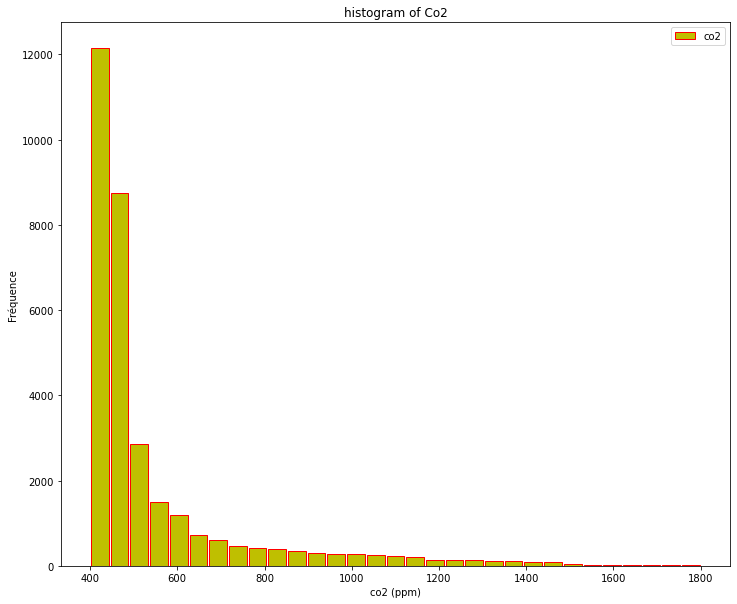

In [2]:
raw_data = pd.read_csv("extract.txt", sep=";")
n=1000
dataco2=raw_data.co2[raw_data.sensor==100]
plt.figure(figsize=(12,10))
plt.hist(dataco2,bins=31,range=(400,1800),align="mid",rwidth=0.9,color="y",edgecolor="r",label="co2")
plt.title("histogram of Co2")
plt.xlabel("co2 (ppm)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

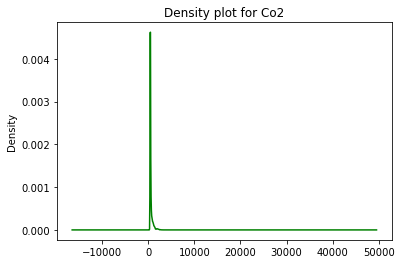

In [3]:
dataco2.plot.density(color='green') 
plt.title('Density plot for Co2') 
plt.show()

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


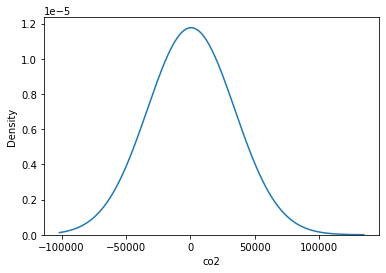

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data = dataco2
sns.kdeplot(data,bw=100)
plt.show()

# Detect outliersset_index

In [5]:
outlier_temp = np.where((raw_data['temperature'] >= (60)) ) # 60°C
outlier_humidity = np.where(raw_data['humidity'] >= (100)) # 100 %
outlier_tvoc = np.where(raw_data['tvoc'] >= (10000)) # 10 000 ppb
outlier_light = np.where(raw_data['light'] >= (100000)) # 10 000
outlier_sound = np.where(raw_data['sound'] >= (5000)) # 1 000
outlier_co2 = np.where(raw_data['co2'] >= (65535)) # 

outliers = np.unique(np.concatenate((outlier_temp[0],outlier_humidity[0],outlier_tvoc[0],
                                    outlier_light[0],outlier_sound[0],outlier_co2[0]),0))

In [6]:
for i in raw_data.columns:
    print(i,raw_data[i].max())

id 362981
date 28/02/2022 23:59:55
room S219
sensor 113
co2 65535
tvoc 65535
temperature 655.35
humidity 655.35
light 65535
sound 65535


In [7]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))

313122


In [8]:
raw_data.drop(['id'], axis=1).head()

,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
0,21/03/2022 14:25:13,S219,107,507,67,24.57,31.46,548,511
1,21/03/2022 14:25:03,S219,106,443,68,24.57,31.57,427,507
2,21/03/2022 14:24:53,S219,105,1087,167,24.78,31.34,494,511
3,21/03/2022 14:24:43,S219,104,620,51,24.87,31.33,623,512
4,21/03/2022 14:23:43,S219,107,506,52,24.55,31.50,552,510


# Separate sensors

In [9]:
# Number of sensors
nb_sensors = len(pd.unique(raw_data['sensor'])) 
sensors_list = raw_data.sensor.unique()
print("We have ",nb_sensors," sensors. Their Id are ", [i_sensor for i,i_sensor in enumerate(sensors_list)])

We have  14  sensors. Their Id are  [107, 106, 105, 104, 110, 109, 108, 103, 102, 101, 100, 112, 111, 113]


In [10]:
# Separate each sensor
for i,i_sensor in enumerate(sensors_list):
    globals()['sensor_%s' % i_sensor] = raw_data.loc[raw_data["sensor"]==i_sensor]
    globals()['sensor_%s' % i_sensor] = globals()['sensor_%s' % i_sensor].set_index('date')
    globals()['sensor_%s' % i_sensor].index = pd.to_datetime(globals()['sensor_%s' % i_sensor].index,dayfirst=True)
    print('sensor_{}'.format(i_sensor))


sensor_107
sensor_106
sensor_105
sensor_104
sensor_110
sensor_109
sensor_108
sensor_103
sensor_102
sensor_101
sensor_100
sensor_112
sensor_111
sensor_113


# Analyse measured data

In [11]:
corr = raw_data.corr()
corr

,id,sensor,co2,tvoc,temperature,humidity,light,sound
id,1.000000,0.324379,0.016087,-0.230451,0.316584,-0.186467,-0.025811,0.036051
sensor,0.324379,1.000000,0.056038,-0.136411,0.197886,-0.122700,-0.295595,0.175360
co2,0.016087,0.056038,1.000000,0.384276,0.427614,0.185503,0.195979,0.044872
tvoc,-0.230451,-0.136411,0.384276,1.000000,0.088187,0.247642,0.153040,-0.001005
temperature,0.316584,0.197886,0.427614,0.088187,1.000000,0.187113,0.120714,0.063187
humidity,-0.186467,-0.122700,0.185503,0.247642,0.187113,1.000000,0.015199,0.007550
light,-0.025811,-0.295595,0.195979,0.153040,0.120714,0.015199,1.000000,0.064373
sound,0.036051,0.175360,0.044872,-0.001005,0.063187,0.007550,0.064373,1.000000


sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

<AxesSubplot:xlabel='sensor', ylabel='temperature'>

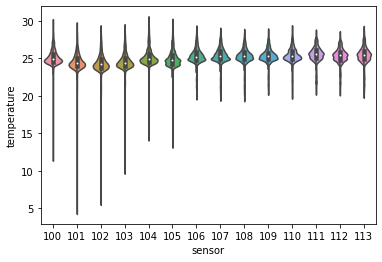

In [12]:
sns.violinplot(x="sensor", y="temperature", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='co2'>

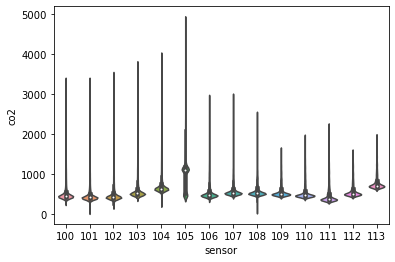

In [13]:
sns.violinplot(x="sensor", y="co2", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='tvoc'>

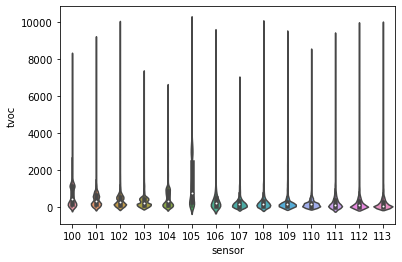

In [14]:
sns.violinplot(x="sensor", y="tvoc", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='humidity'>

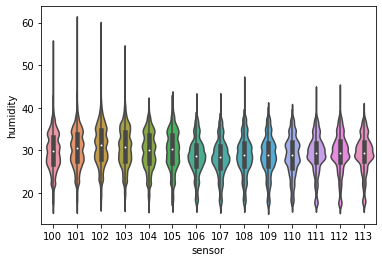

In [15]:
sns.violinplot(x="sensor", y="humidity", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='light'>

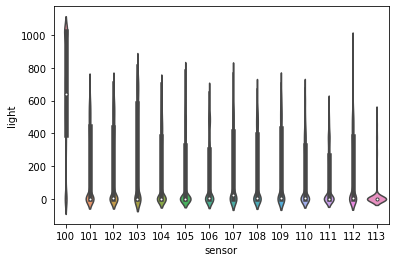

In [16]:
sns.violinplot(x="sensor", y="light", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='sound'>

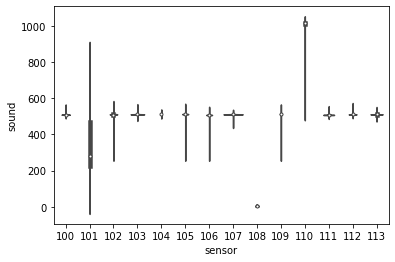

In [17]:
sns.violinplot(x="sensor", y="sound", data=raw_data)

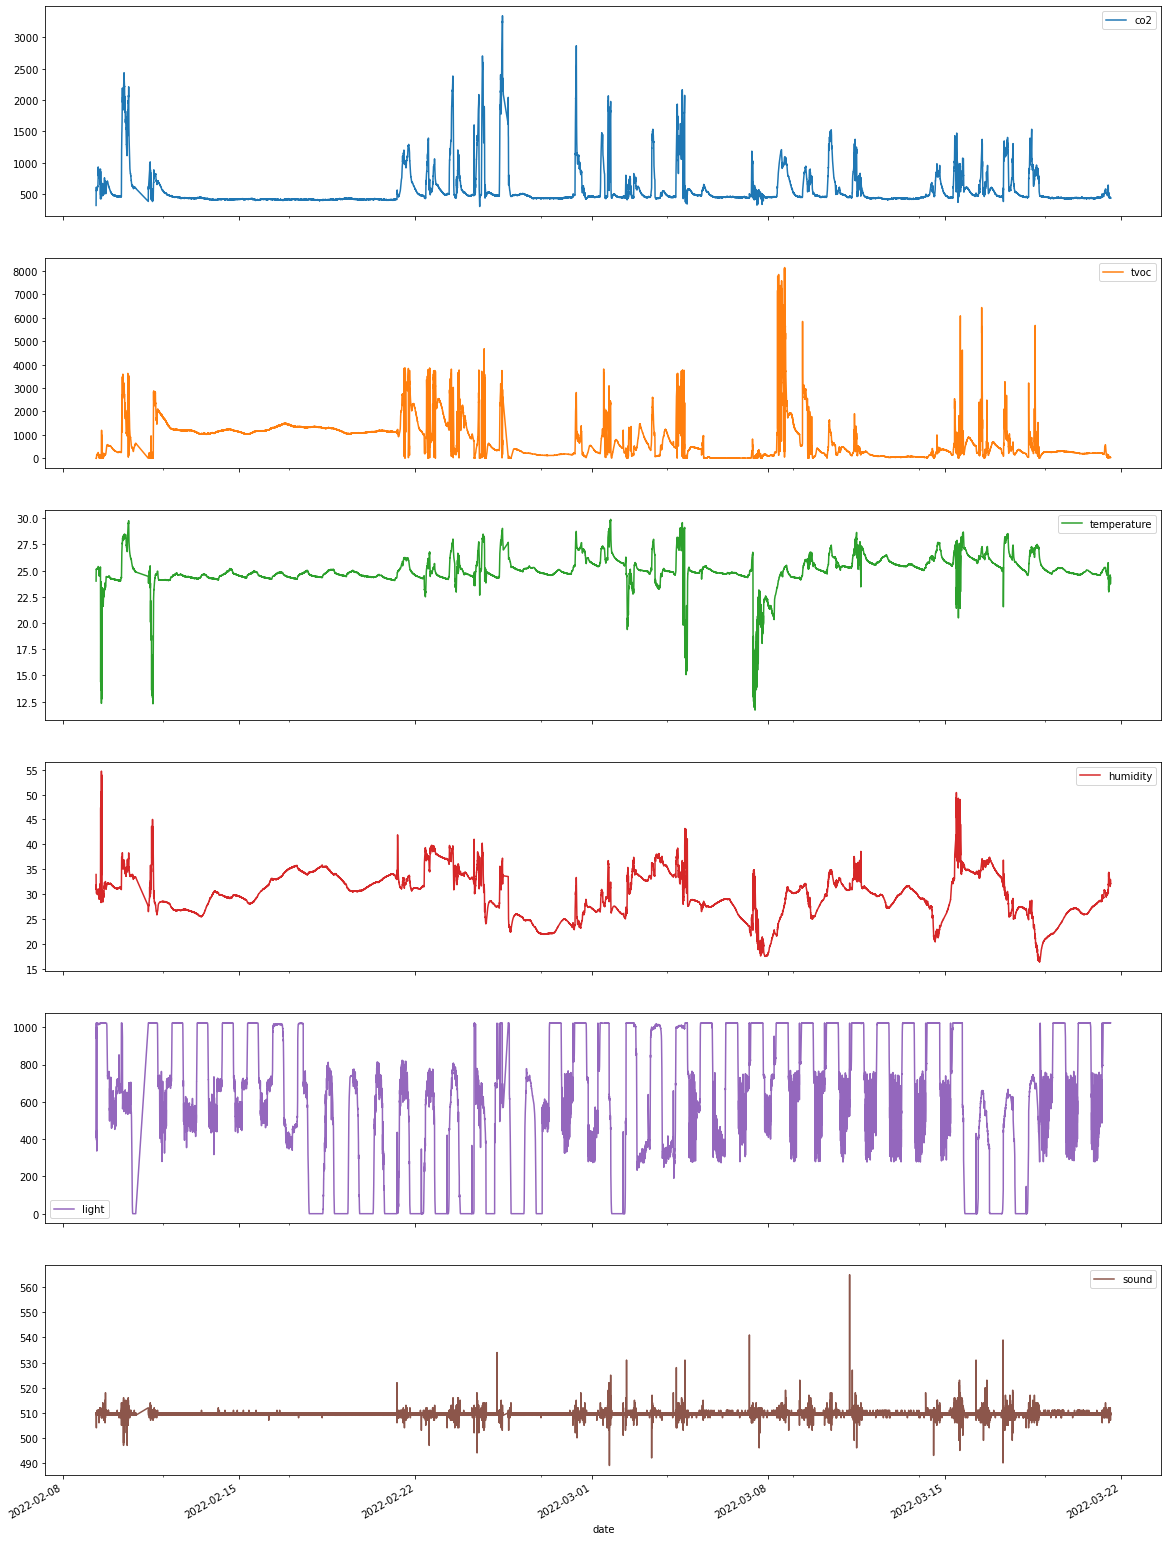

In [18]:
# for sensor 100
axs = sensor_100.drop(["id","sensor"],axis=1).plot(figsize=(20, 30), subplots=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

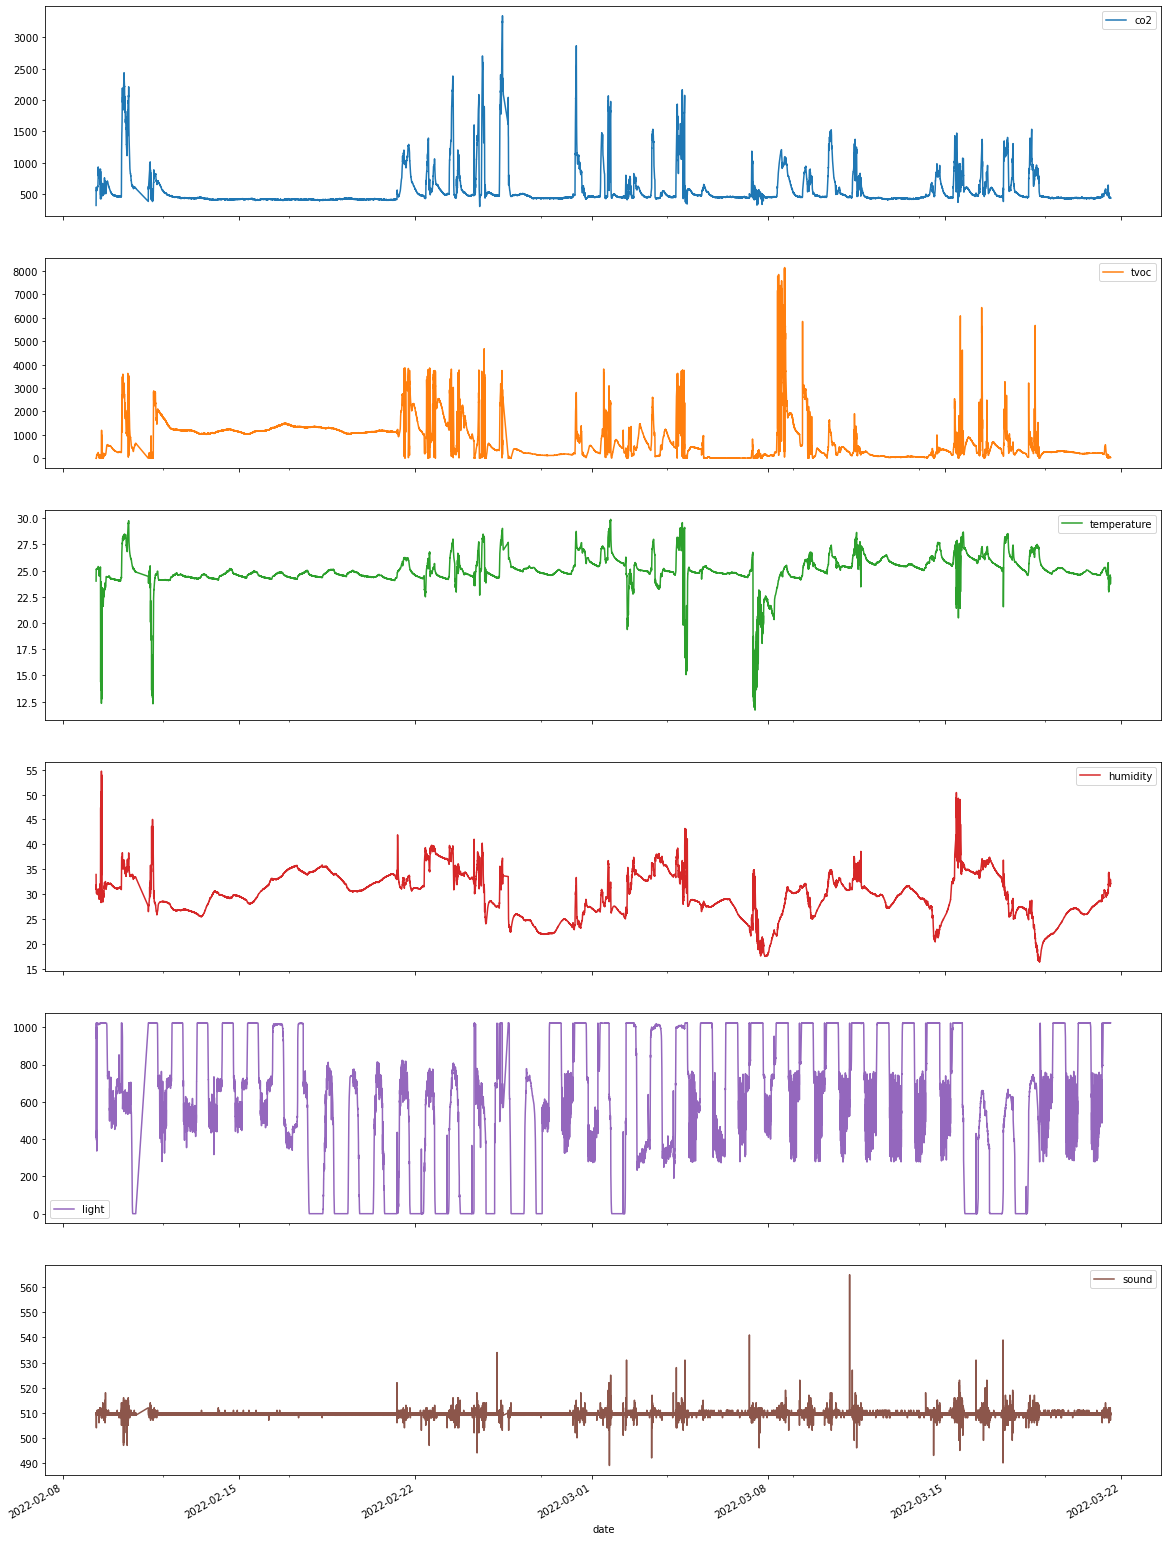

In [19]:
sensor_100.drop(["id","sensor"],axis=1).plot(figsize=(20, 30), subplots=True)

Sensors to display :  [104 110 109 108 103 102 101 100 112 111 113]


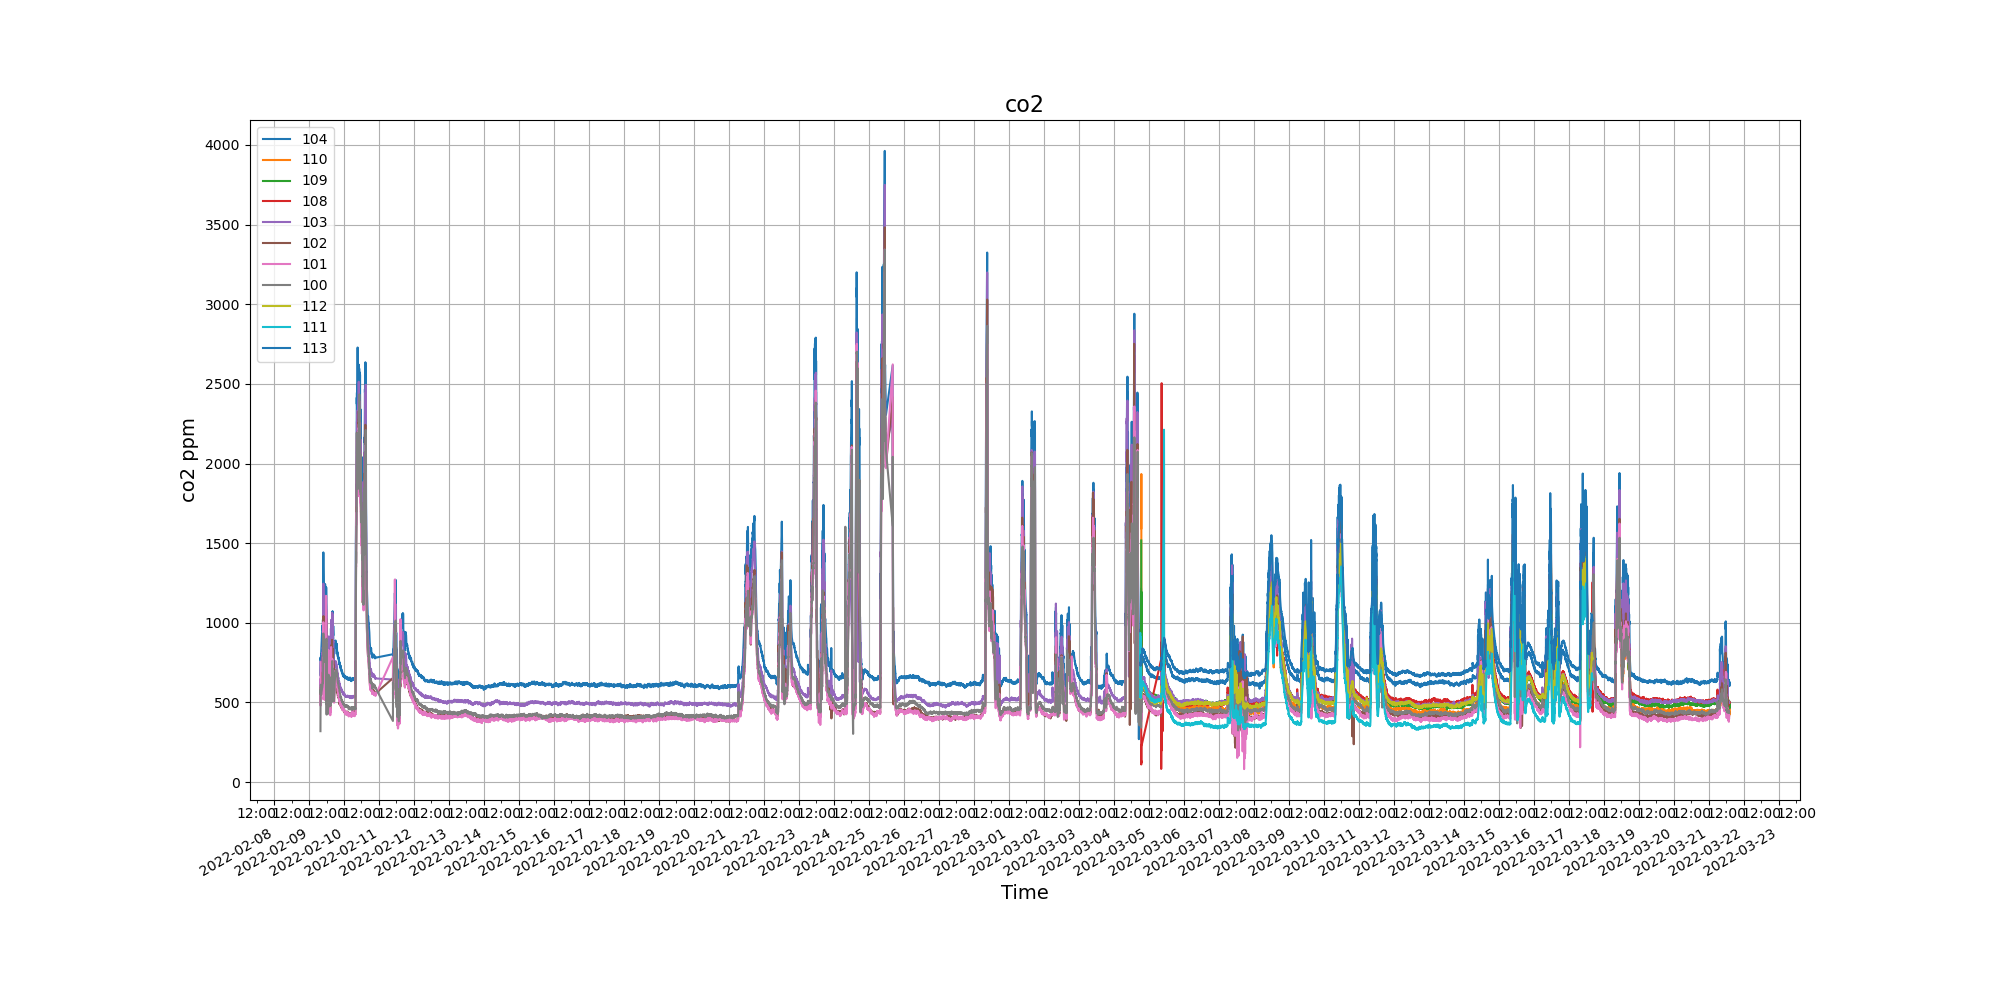

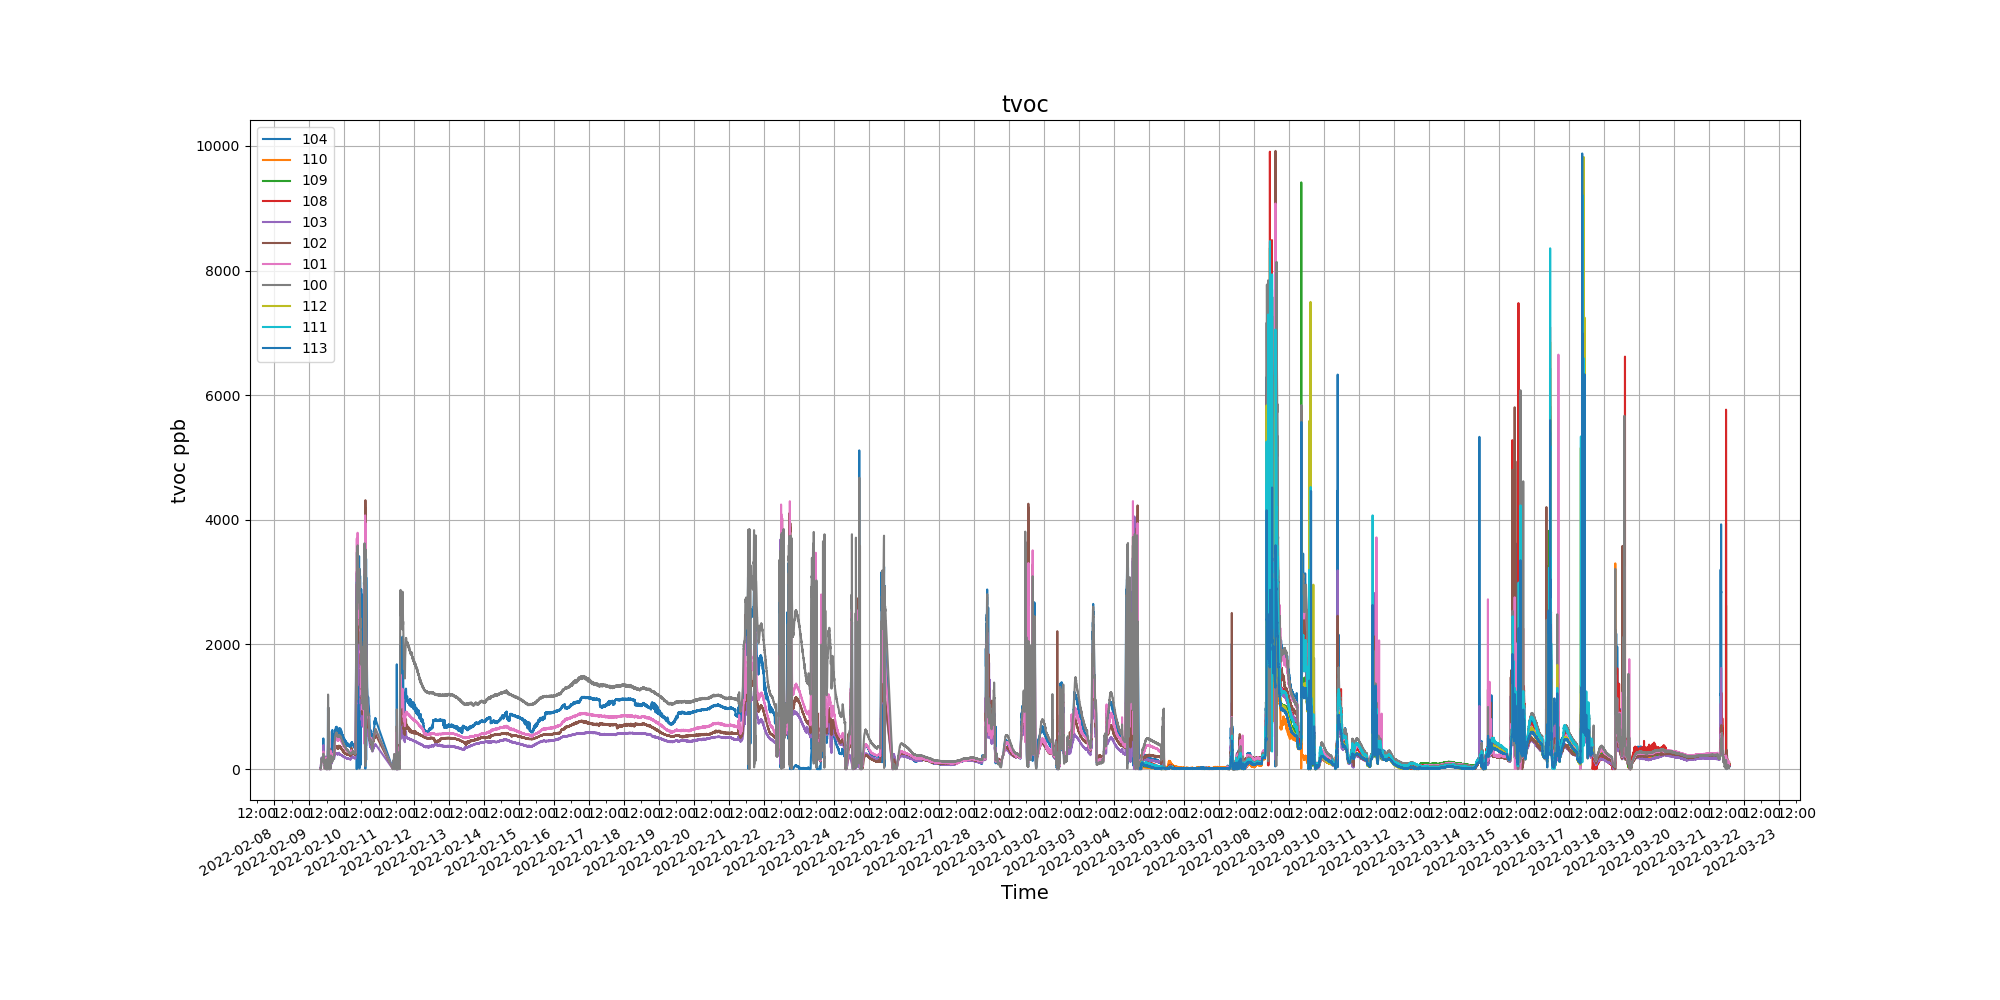

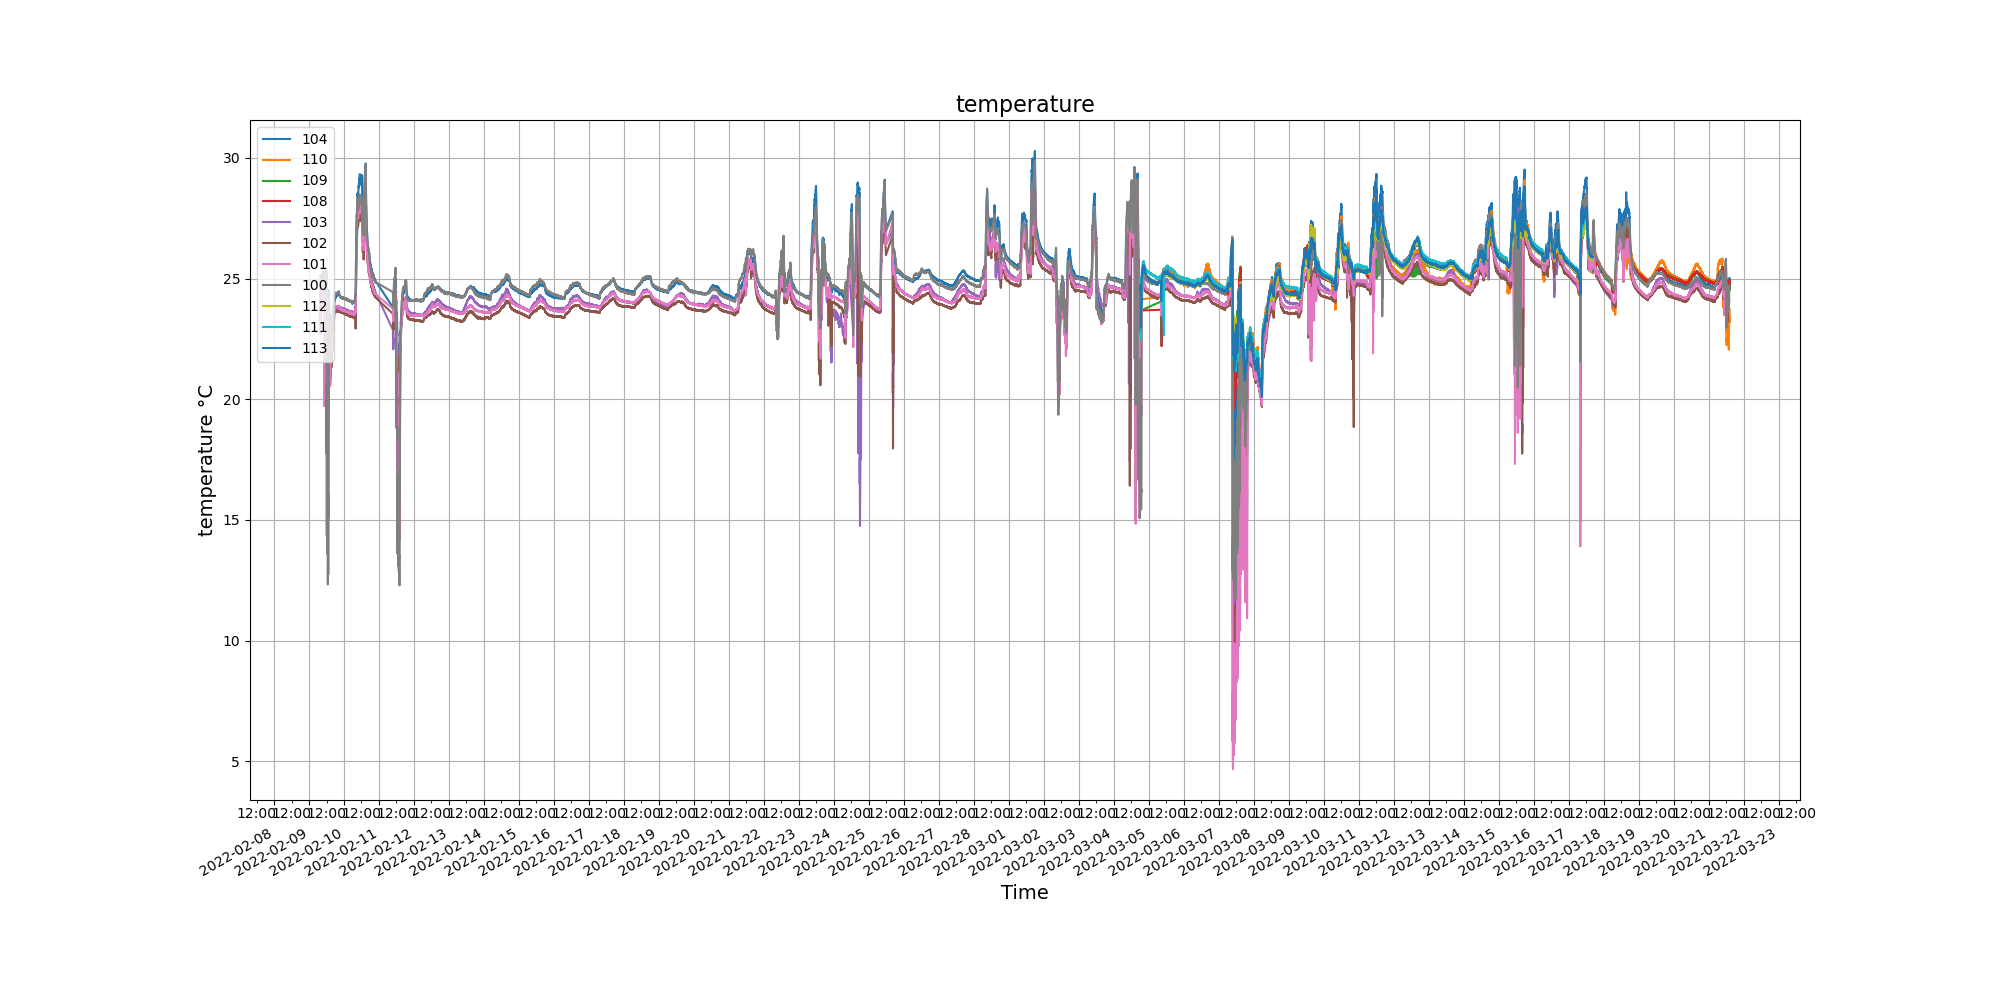

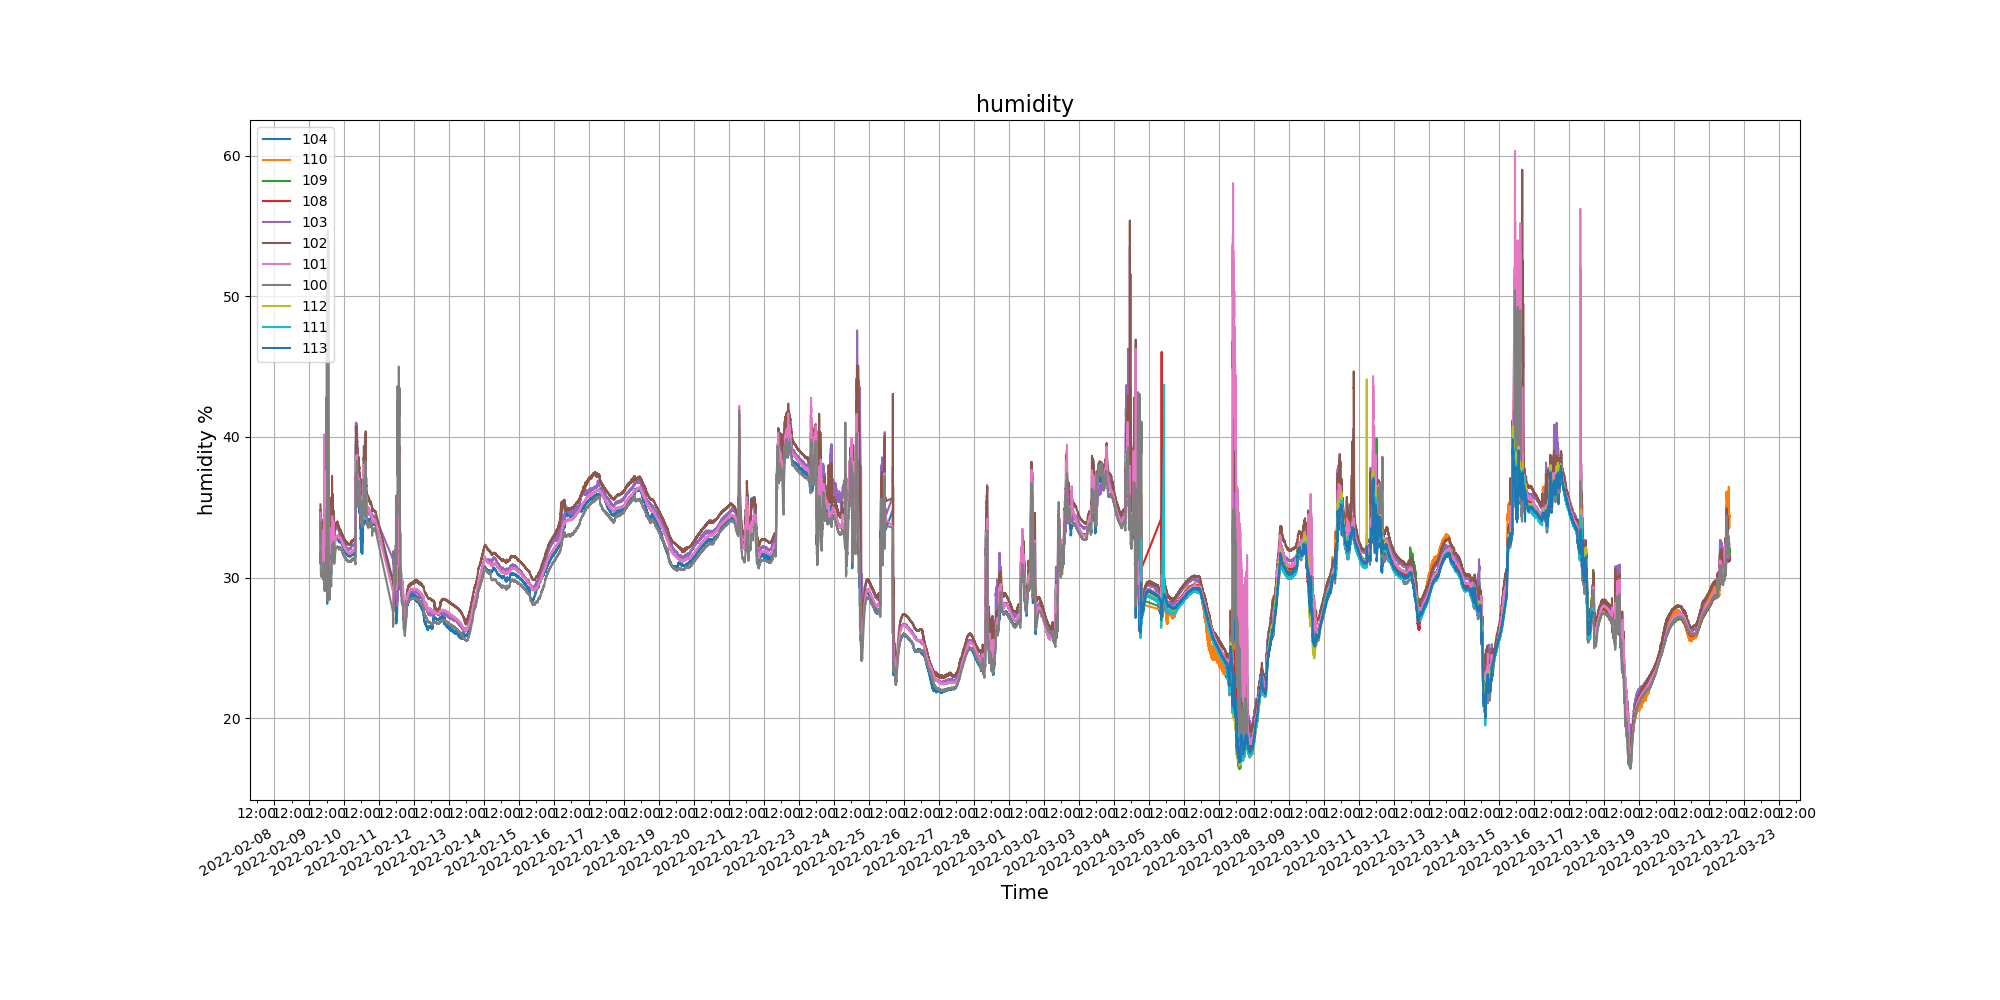

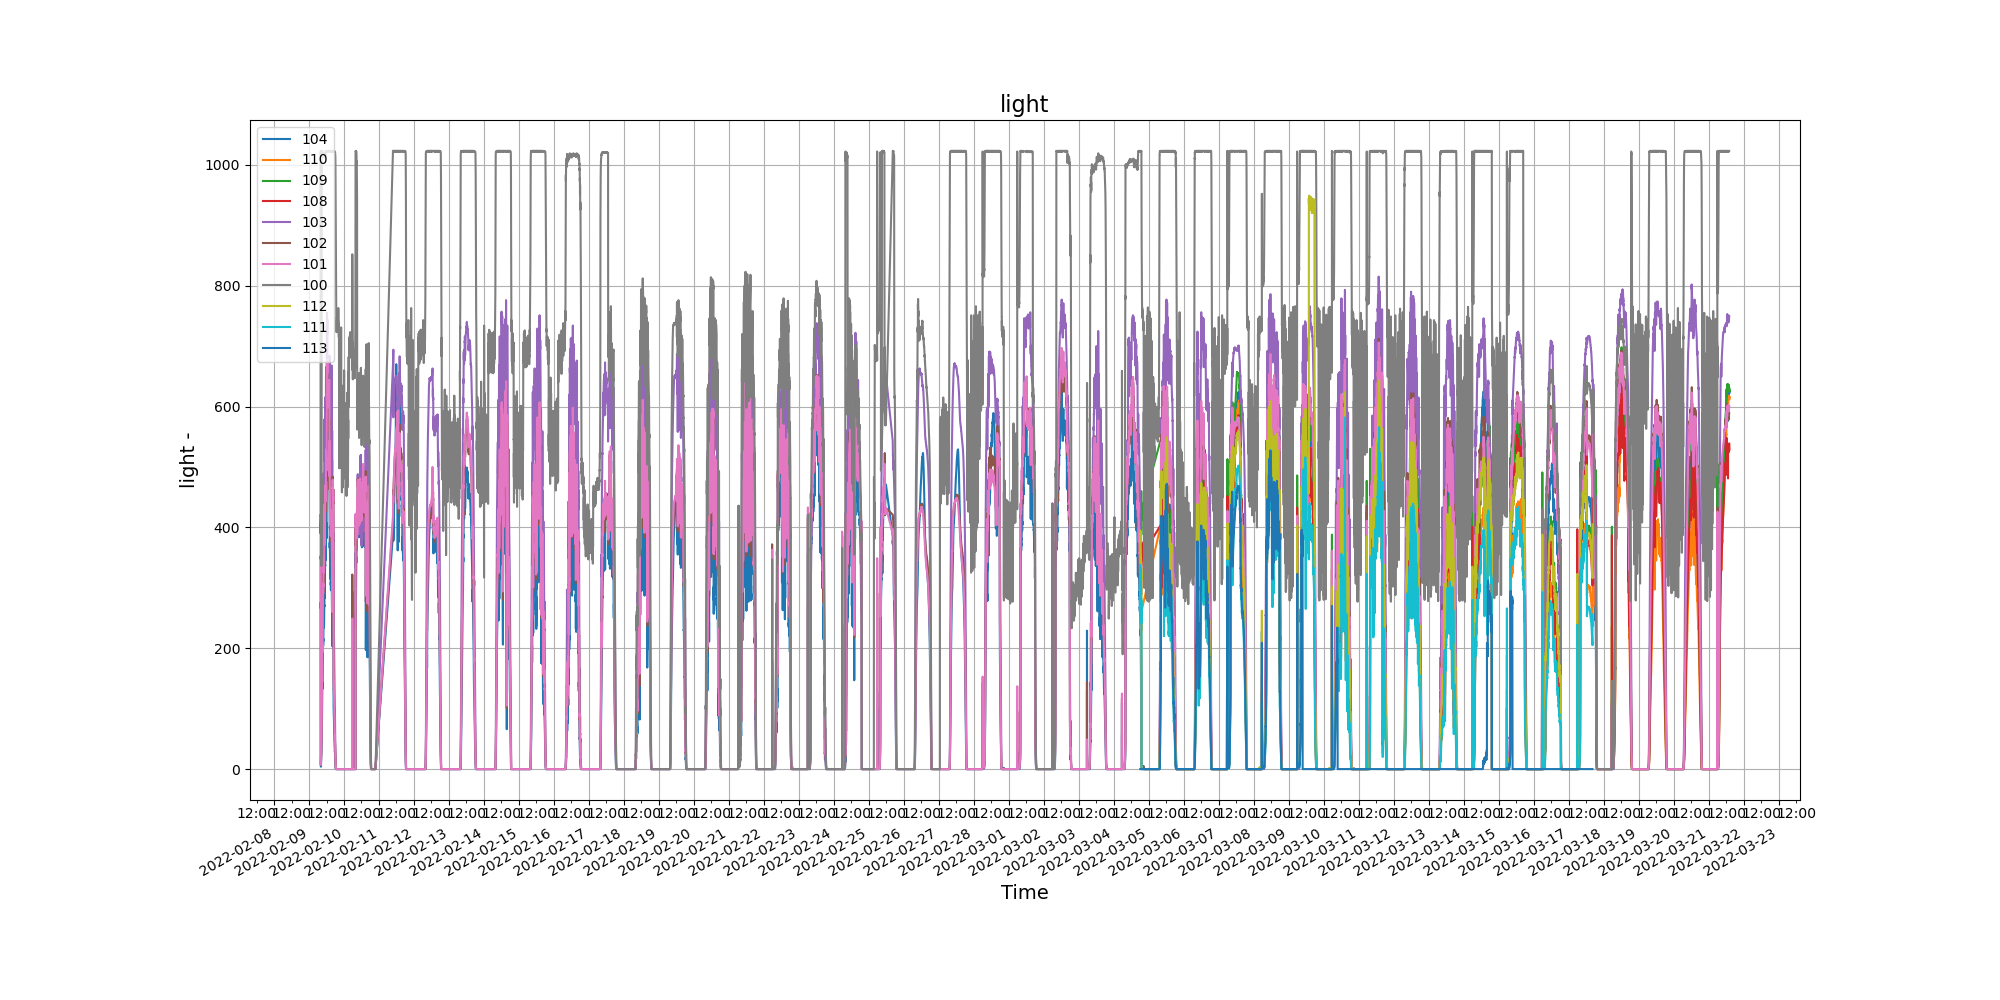

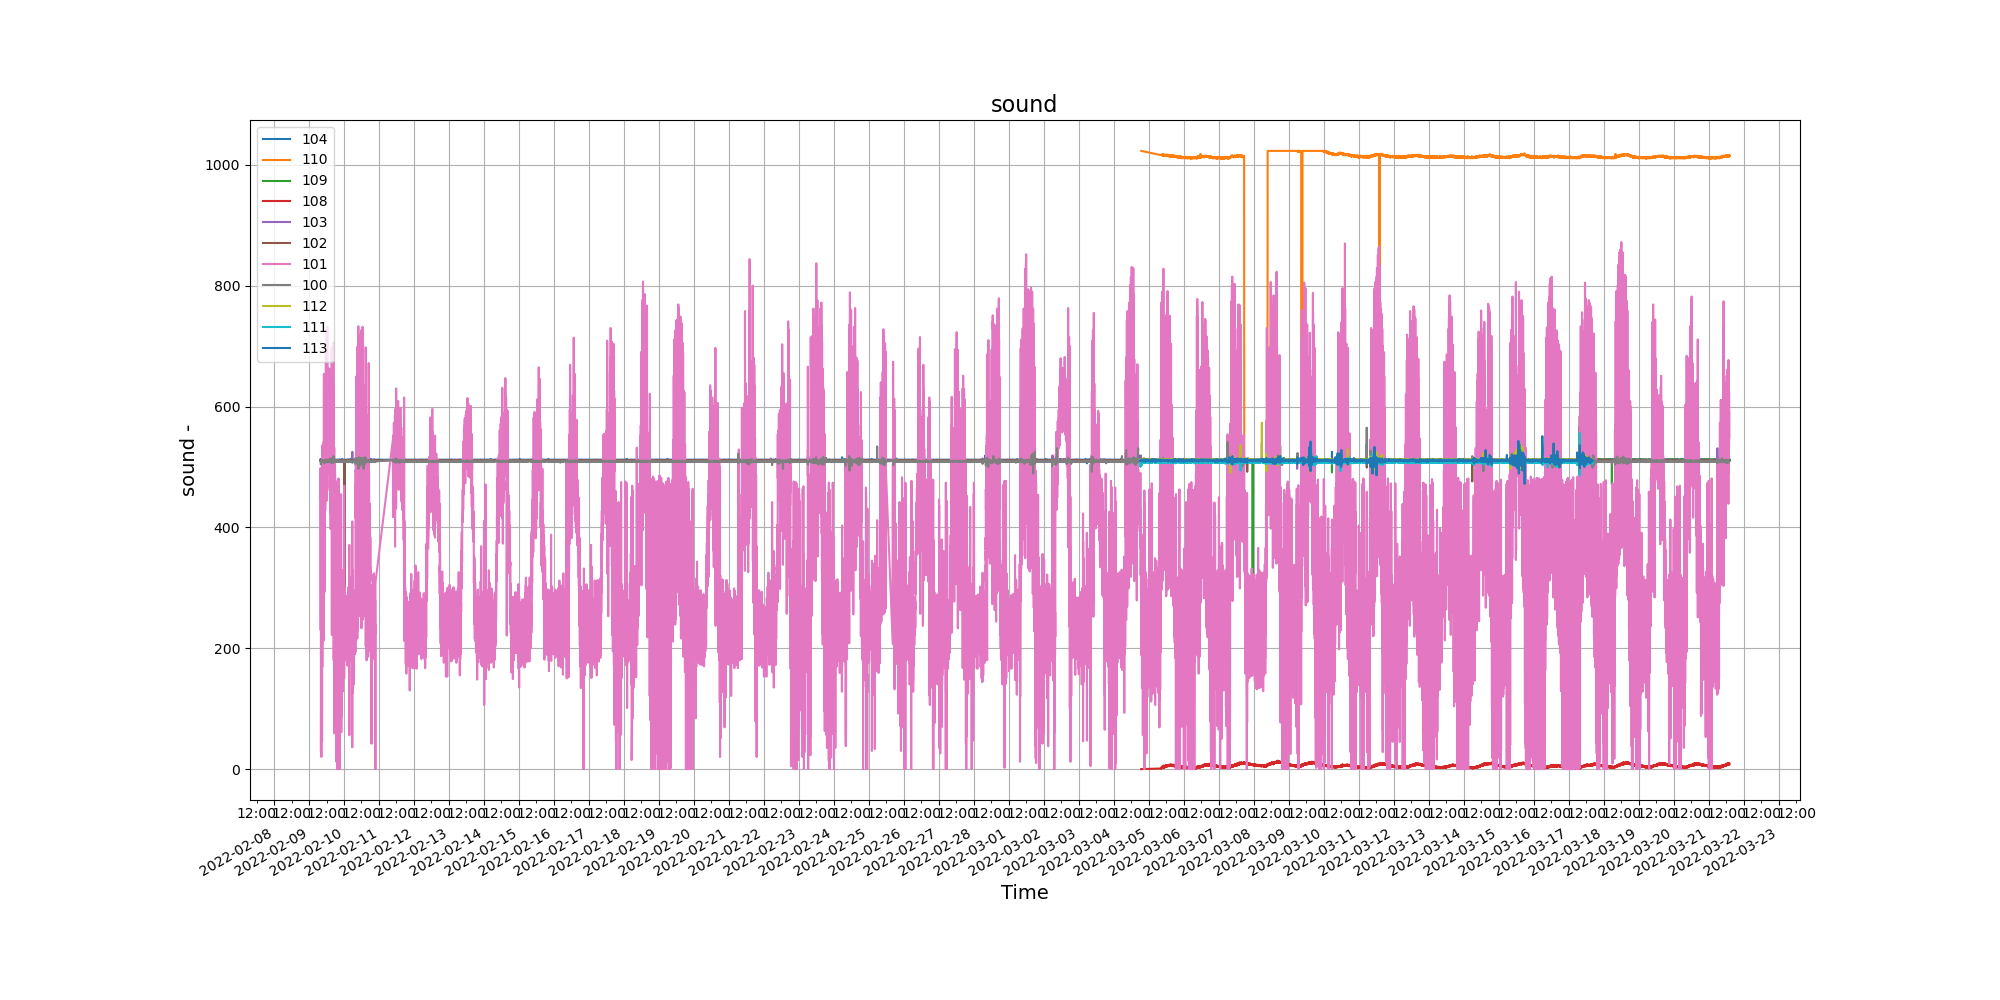

In [20]:
# Compare data from all sensors
import ipywidgets as widgets
%matplotlib widget

excluded_sensors = [105,106,107]
sensors_list_updated = np.delete(sensors_list, [np.where(sensors_list == i) for i in excluded_sensors])
print("Sensors to display : ",sensors_list_updated)

values = ["co2","tvoc","temperature","humidity" ,"light","sound"]
units  = ["ppm","ppb","°C","%","-","-"]

hours = mdates.HourLocator(interval = 12)
h_fmt = mdates.DateFormatter('%H:%M')
days = mdates.DayLocator(interval=1)
d_fmt = mdates.DateFormatter('%Y-%m-%d')

for i,i_value in enumerate(values):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for i_sensor in sensors_list_updated : 
        globals()['ax_%s' % i_sensor] = pd.Series(globals()['sensor_%s' % i_sensor][i_value]).plot(grid=True, 
                                                                                                   label=str(i_sensor))
    
    #df1 = pd.Series(sensor_100[i_value])
    #df2 = pd.Series(sensor_101[i_value])
    #df3 = pd.Series(sensor_102[i_value])
    #df4 = pd.Series(sensor_103[i_value])
    #df5 = pd.Series(sensor_104[i_value])
    #df6 = pd.Series(sensor_105[i_value])

    #ax1 = df1.plot(grid=True, label='100')
    #ax2 = df2.plot(grid=True, label='101')
    #ax3 = df3.plot(grid=True, label='102')
    #ax4 = df4.plot(grid=True, label='103')
    #ax5 = df5.plot(grid=True, label='104')
    #ax6 = df6.plot(grid=True, label='105')
    
    #plt.plot(sensor_101[i_value], label ="101")
    #plt.plot(sensor_102[i_value], label ="102")
    #plt.plot(sensor_103[i_value], label ="103")
    #plt.plot(sensor_104[i_value], label ="104")
    #plt.plot(sensor_105[i_value], label ="105")

    plt.ylabel((i_value+" "+units[i]), fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.title(i_value, fontsize=16)
    
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
    plt.legend(loc="upper left")

    #display plot
    plt.show()

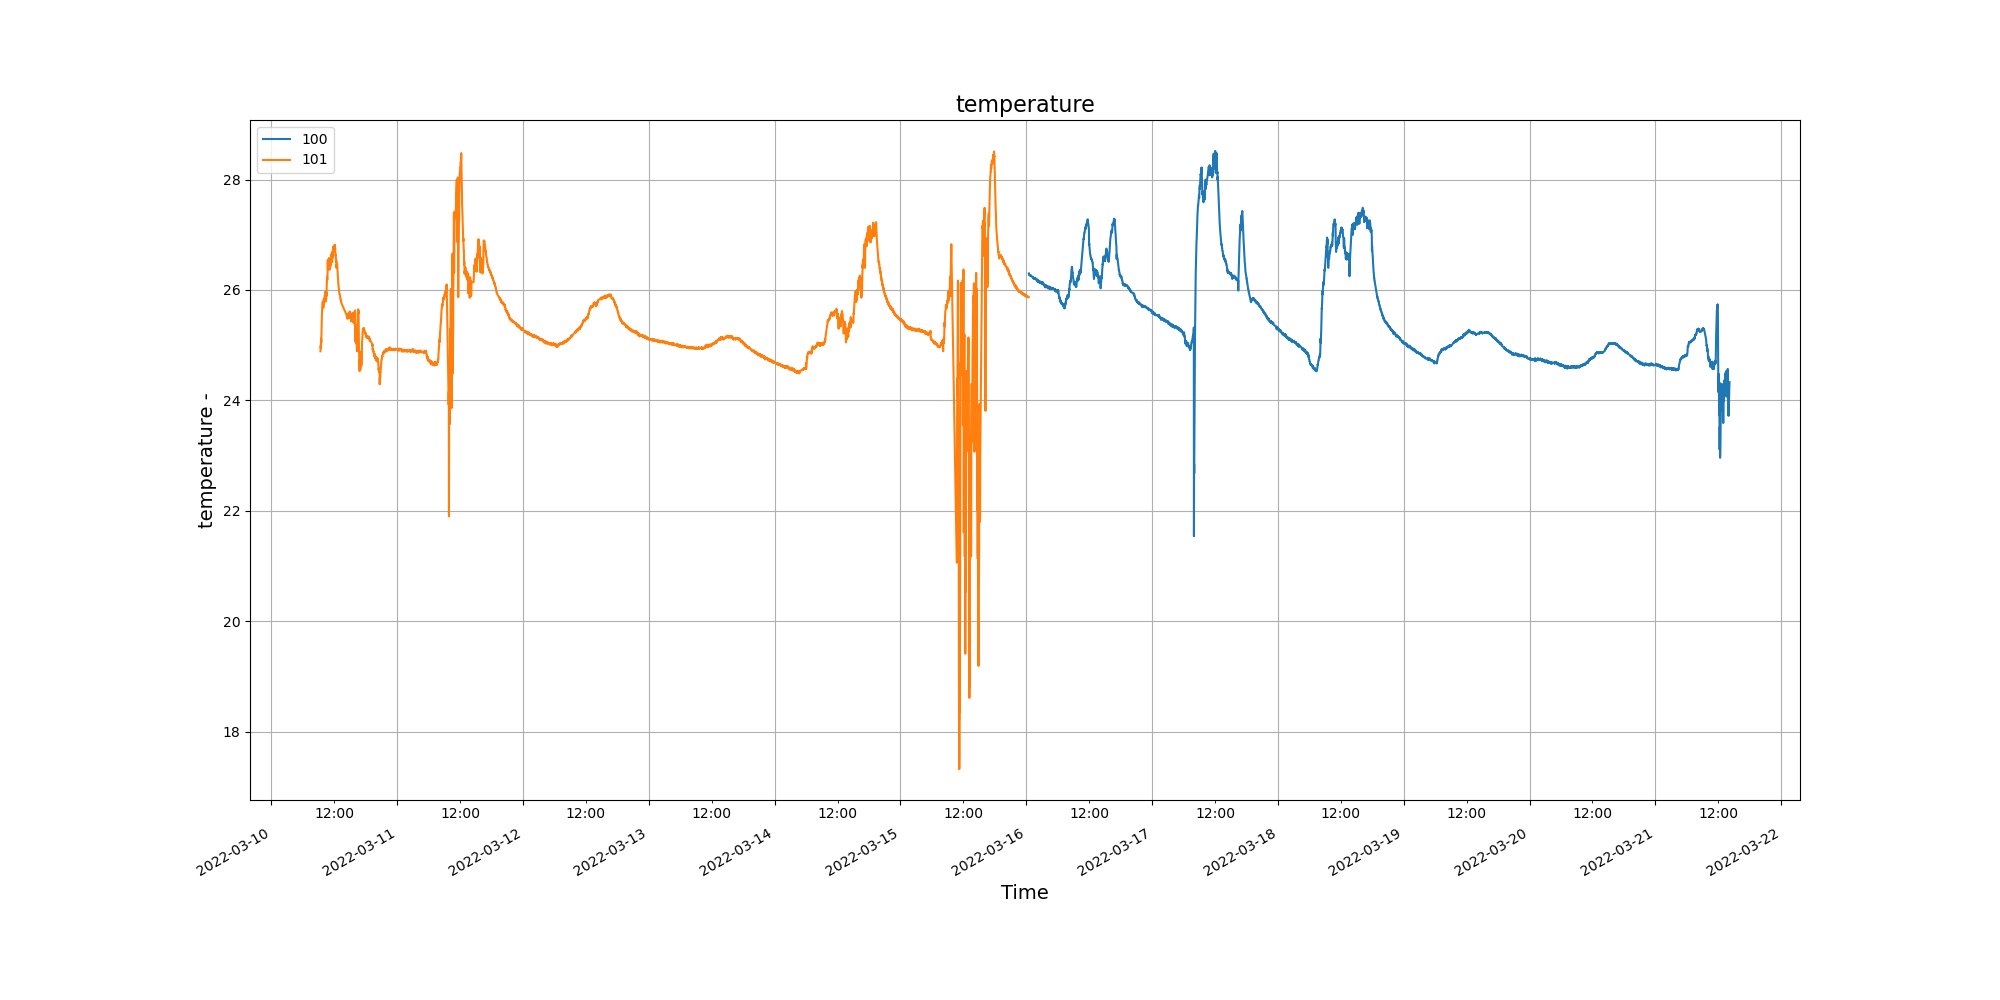

In [22]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value])[0:5000]
df2 = pd.Series(sensor_101[i_value])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [332]:
print(sensor_100.shape, sensor_101.shape)

(32448, 9) (32399, 9)


In [333]:
sensor_103.id

date
2022-03-21 14:09:18    362801
2022-03-21 14:07:48    362797
2022-03-21 14:06:18    362793
2022-03-21 14:04:48    362789
2022-03-21 14:03:18    362785
                        ...  
2022-02-09 08:02:02        28
2022-02-09 07:56:59        22
2022-02-09 07:55:09        16
2022-02-09 07:53:19        10
2022-02-09 07:51:29         4
Name: id, Length: 32349, dtype: int64

In [361]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_101.drop(['id','room','sensor'],axis=1)
sensor_100_ = sensor_100.drop(['id','room','sensor'],axis=1)
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

before (32448, 6) (32399, 6) 0
After (11596, 6) (32399, 9) 607


(11596, 12)

In [340]:
sensor_101.co2.isnull().sum

623

<ipython-input-362-e3312272993a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sensor_100_['2022-03-02'].co2.plot()


<AxesSubplot:xlabel='date'>

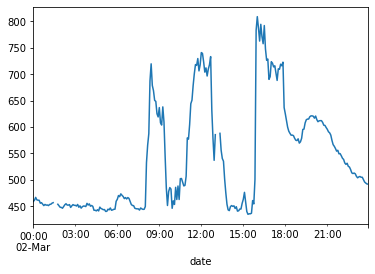

In [362]:
sensor_100_['2022-03-02'].co2.plot()

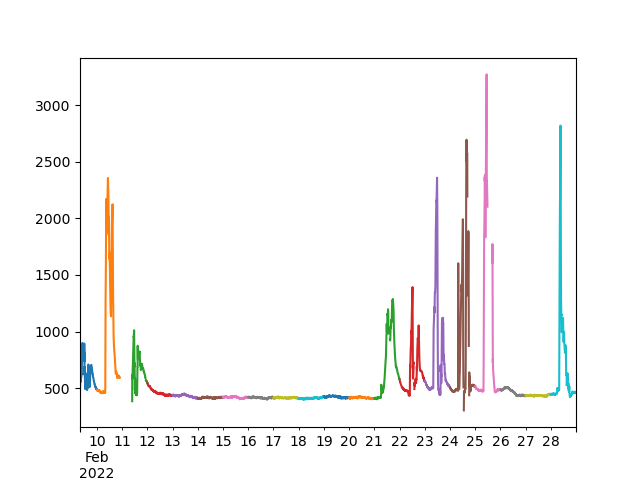

In [443]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

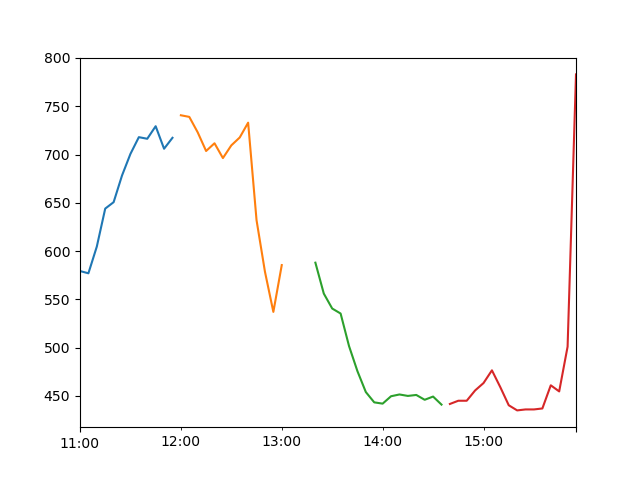

In [440]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [359]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:00:27')

In [363]:
ydif.max()
hawks = sensor_100_

<Figure size 720x432 with 0 Axes>

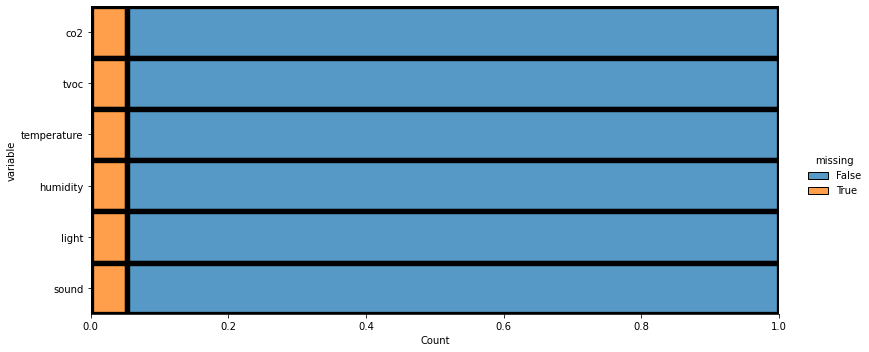

In [370]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [376]:

ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:05:00')

In [377]:
ydif.max()

Timedelta('0 days 00:05:00')

In [ ]:
for i in range(1150):
    print(sensor_100_[['co2', 'temperature','humidity']][i*10:(i+1)*10])

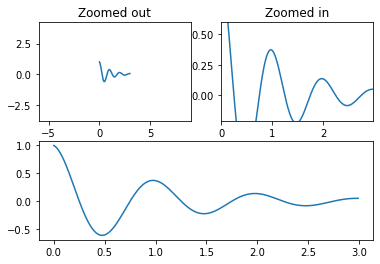

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()